In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw/first_dataset_lyrics_only.csv')

In [4]:
df.head()

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics
0,Pop,Adel Tawil,Lieder,2013,Immer da,2010,256740,Immer da by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}",Immer da Lyrics\r\n\r\nManchmal hast du gar ni...
1,Pop,Adel Tawil,Lieder,2013,Wenn Du liebst,2010,256742,Wenn du liebst by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 4, 'hot': False, 'p...",Wenn du liebst Lyrics\r\nGanz allein im schwar...
2,Pop,Adel Tawil,Lieder,2013,Lieder,2010,236655,Lieder by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Lieder Lyrics\r\n\r\nIch ging wie ein Ägypter\...
3,Pop,Adel Tawil,Lieder,2013,Weinen,2010,256745,Weinen by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Weinen Lyrics\r\n\r\nDu warst die ganze Welt f...
4,Pop,Adel Tawil,Lieder,2013,Unter Wasser,2010,256747,Unter Wasser by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}","Unter Wasser Lyrics\r\n\r\nKeine Chance, es is..."


### 1. Anzahl der Schipfwörter pro Genre

In [5]:
# Load the swear words from the file
with open('../data/raw/schimpfwörter.txt', 'r', encoding='utf-8') as file:
    swear_words = [word.strip() for word in file.readlines()]

# Preprocess the lyrics and count total swear word occurrences per genre
swear_word_counts = {}
for index, row in df.iterrows():
    genre = row['genre']
    lyrics = row['lyrics']
    
    if genre not in swear_word_counts:
        swear_word_counts[genre] = 0

    for word in swear_words:
        if word.lower() in lyrics.lower():
            swear_word_counts[genre] += 1

# Prepare data for the bar chart
genres = list(swear_word_counts.keys())
counts = list(swear_word_counts.values())

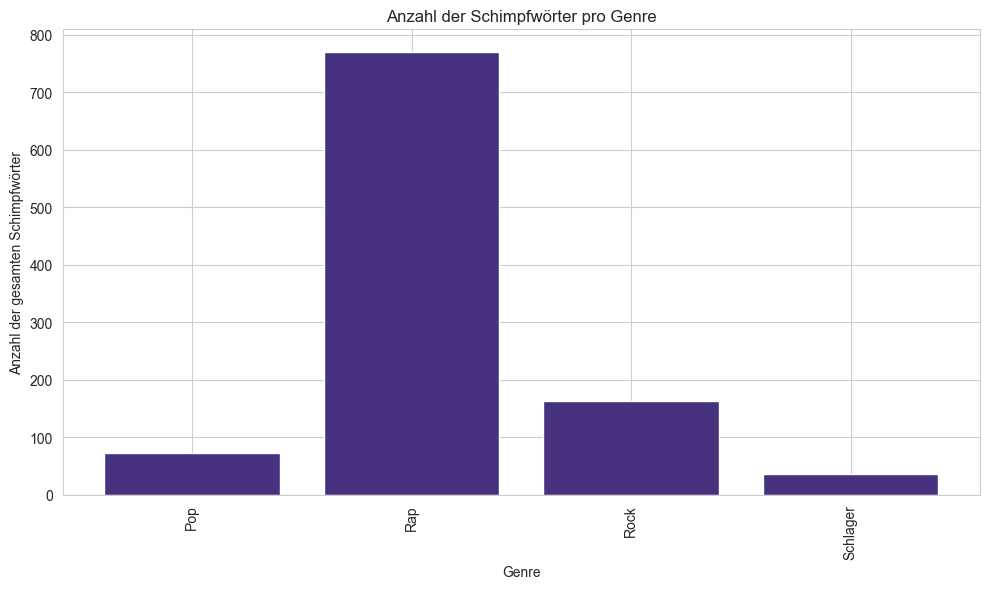

In [34]:
# Create a bar chart to visualize the swear word counts per genre
plt.figure(figsize=(10, 6))
plt.bar(genres, counts)
plt.title('Anzahl der Schimpfwörter pro Genre')
plt.xlabel('Genre')
plt.ylabel('Anzahl der gesamten Schimpfwörter')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 2. Songlänge (anhand der Wörter) pro Genre

In [7]:
# Create a new column 'word_count' with the count of words from the 'lyrics' column
df['word_count'] = df['lyrics'].str.split().apply(len)

# Print the updated DataFrame
df.head()

,genre,interpret,album,release_year,songtitle,decade,song_id,full_title,release_date_components_raw,release_date_for_display,stats_raw,lyrics,word_count
0,Pop,Adel Tawil,Lieder,2013,Immer da,2010,256740,Immer da by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}",Immer da Lyrics\r\n\r\nManchmal hast du gar ni...,310
1,Pop,Adel Tawil,Lieder,2013,Wenn Du liebst,2010,256742,Wenn du liebst by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 4, 'hot': False, 'p...",Wenn du liebst Lyrics\r\nGanz allein im schwar...,320
2,Pop,Adel Tawil,Lieder,2013,Lieder,2010,236655,Lieder by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Lieder Lyrics\r\n\r\nIch ging wie ein Ägypter\...,366
3,Pop,Adel Tawil,Lieder,2013,Weinen,2010,256745,Weinen by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False, 'p...",Weinen Lyrics\r\n\r\nDu warst die ganze Welt f...,232
4,Pop,Adel Tawil,Lieder,2013,Unter Wasser,2010,256747,Unter Wasser by Adel Tawil,"{'year': 2013, 'month': 11, 'day': 8}","November 8, 2013","{'unreviewed_annotations': 0, 'hot': False}","Unter Wasser Lyrics\r\n\r\nKeine Chance, es is...",307


In [10]:
import numpy as np

## Calculate the quartiles and IQR for 'word_count' column
#q1 = df['word_count'].quantile(0.25)
#q3 = df['word_count'].quantile(0.75)
#iqr = q3 - q1
#
## Define the threshold for excluding outliers (e.g., 1.5 times the IQR)
#threshold = 1.5
#
## Filter out the outliers based on the IQR threshold
#filtered_df = df[(df['word_count'] >= q1 - threshold * iqr) & (df['word_count'] <= q3 + threshold * iqr)]

# Calculate the median absolute deviation (MAD) for 'word_count' column
median = df['word_count'].median()
mad = np.median(np.abs(df['word_count'] - median))

# Define the threshold for excluding outliers (e.g., 3 times the MAD)
threshold = 3

# Filter out the outliers based on the MAD threshold
filtered_df = df[np.abs(df['word_count'] - median) <= threshold * mad]

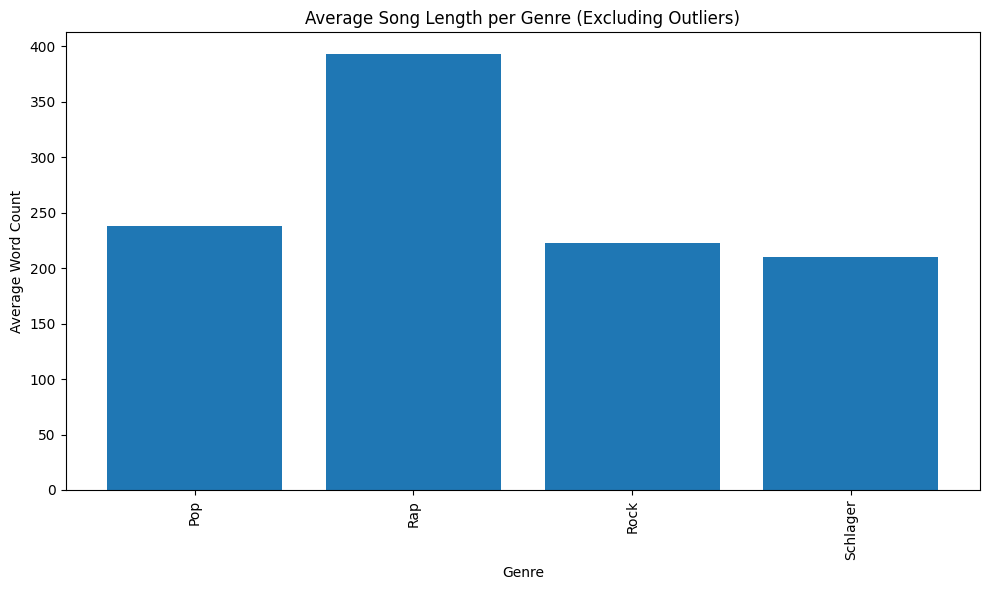

In [11]:
# Calculate the average song length per genre after excluding outliers
avg_song_lengths = filtered_df.groupby('genre')['word_count'].mean()

# Create a bar chart to visualize the average song length per genre (excluding outliers)
plt.figure(figsize=(10, 6))
plt.bar(avg_song_lengths.index, avg_song_lengths.values)
plt.title('Average Song Length per Genre (Excluding Outliers)')
plt.xlabel('Genre')
plt.ylabel('Average Word Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


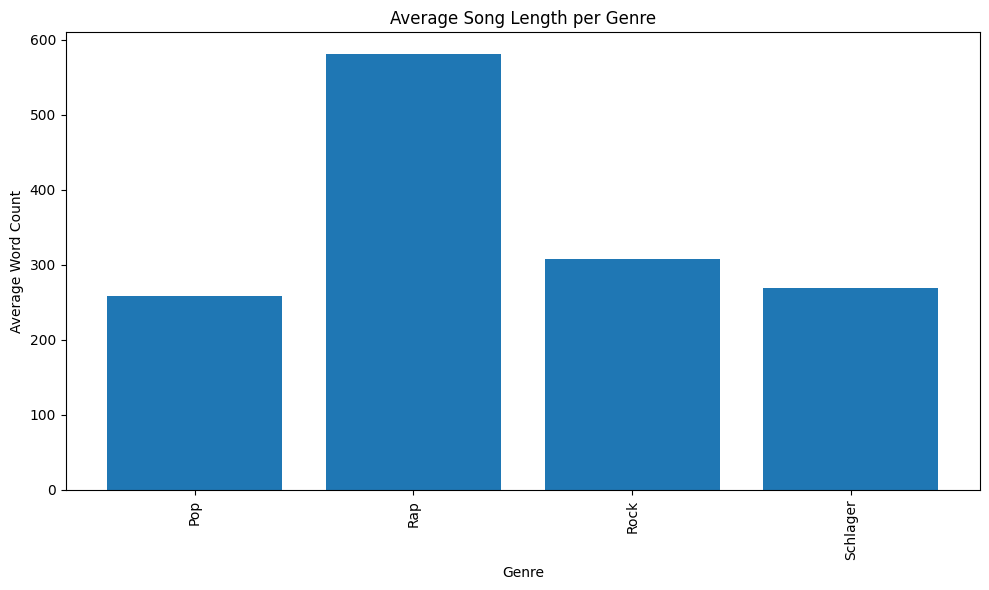

In [17]:
# Calculate the average song length per genre
avg_song_lengths = df.groupby('genre')['word_count'].mean()

# Create a bar chart to visualize the average song length per genre
plt.figure(figsize=(10, 6))
plt.bar(avg_song_lengths.index, avg_song_lengths.values)
plt.title('Average Song Length per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Word Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 3. Häufigkeit der Schimpfwörter im laufe der Jahre pro Genre?

In [12]:
# Load the swear words from the file
with open('../data/raw/schimpfwörter.txt', 'r', encoding='utf-8') as file:
    swear_words = [word.strip() for word in file.readlines()]

# Preprocess the lyrics and count swear word occurrences per year and genre
swear_word_counts = {}
for index, row in df.iterrows():
    genre = row['genre']
    year = row['release_year']
    lyrics = row['lyrics']
    
    if genre not in swear_word_counts:
        swear_word_counts[genre] = {}

    if year not in swear_word_counts[genre]:
        swear_word_counts[genre][year] = 0

    for word in swear_words:
        if word.lower() in lyrics.lower():
            swear_word_counts[genre][year] += 1

# Prepare data for the line plot
years = sorted(list(set(df['release_year'])))
genres = list(swear_word_counts.keys())
data = {genre: [swear_word_counts[genre].get(year, 0) for year in years] for genre in genres}


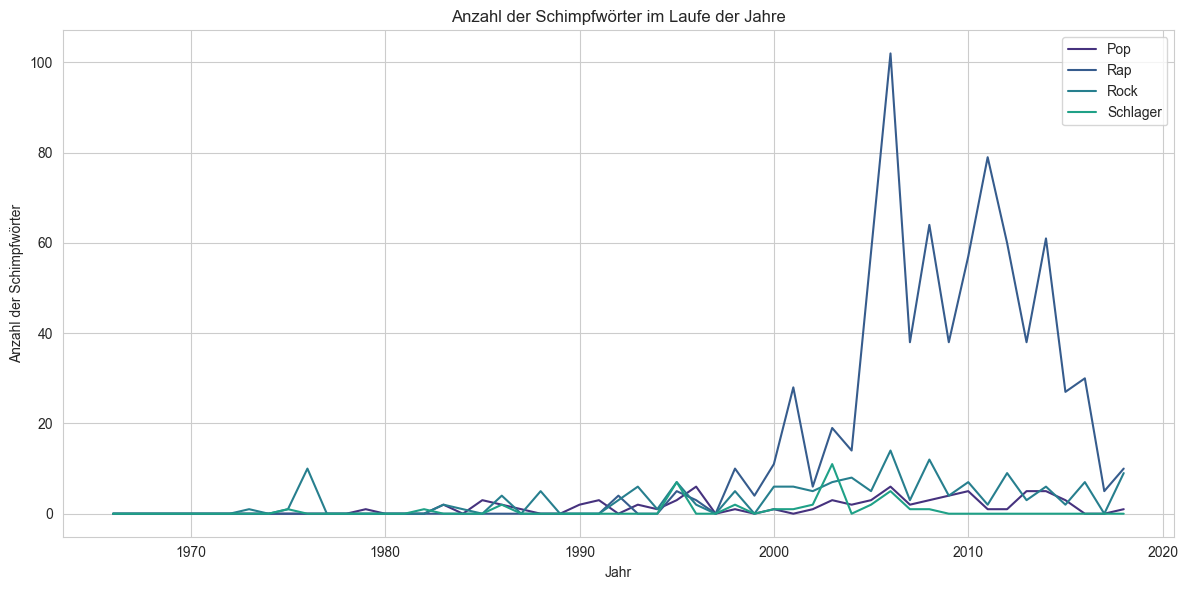

In [33]:
# Create a line plot to visualize the frequency of swear words over the years per genre
plt.figure(figsize=(12, 6))
for genre in genres:
    plt.plot(years, data[genre], label=genre)
plt.title('Anzahl der Schimpfwörter im Laufe der Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Schimpfwörter')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Heatmap mit x Achse Genre Y Achse Schimpwörter pro Künstler

In [16]:
import seaborn as sns

# Load the swear words from the file
with open('../data/raw/schimpfwörter.txt', 'r', encoding='utf-8') as file:
    swear_words = [word.strip() for word in file.readlines()]

# Create a DataFrame to store the swear word counts per genre and artist
swear_word_counts = pd.DataFrame(index=df['genre'].unique(), columns=df['interpret'].unique())

# Initialize the DataFrame with zeros
swear_word_counts.fillna(0, inplace=True)

# Iterate over the DataFrame and count the swear word occurrences
for index, row in df.iterrows():
    genre = row['genre']
    artist = row['interpret']
    lyrics = row['lyrics']
    
    count = 0
    for word in swear_words:
        count += lyrics.lower().count(word.lower())
    
    swear_word_counts.loc[genre, artist] += count

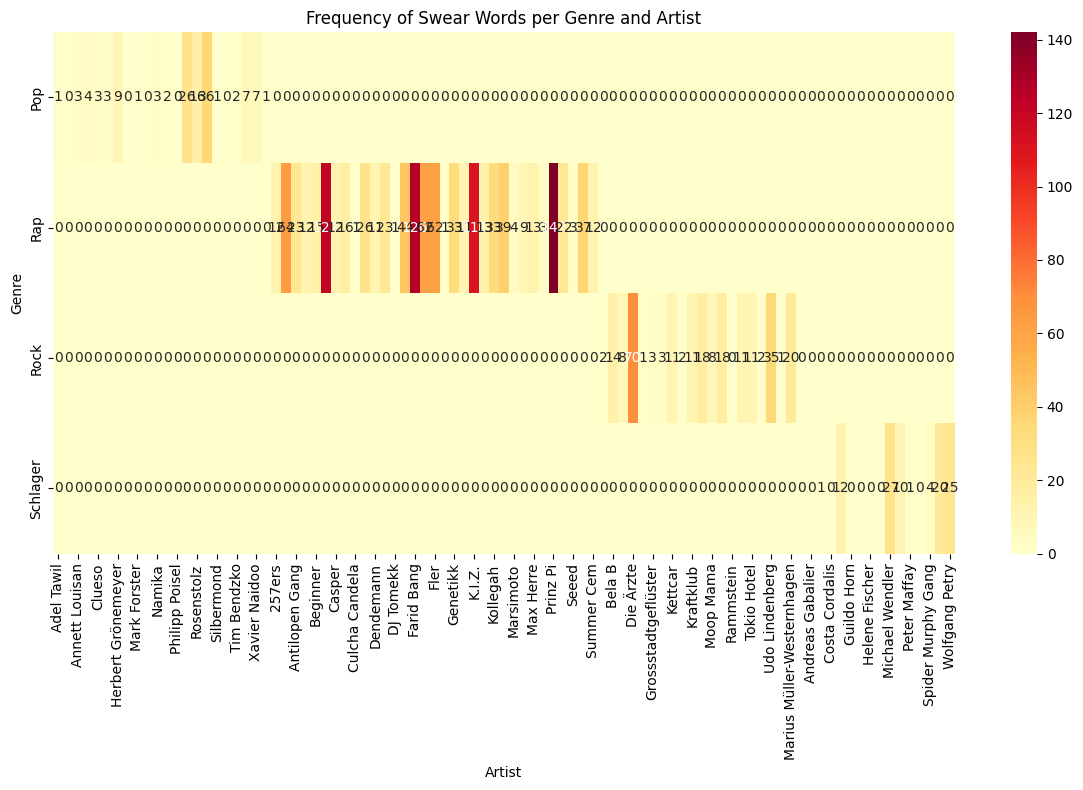

In [17]:
# Create a heatmap to visualize the frequency of swear words per genre and artist
plt.figure(figsize=(12, 8))
sns.heatmap(swear_word_counts, cmap='YlOrRd', annot=True, fmt='g', cbar=True)
plt.title('Frequency of Swear Words per Genre and Artist')
plt.xlabel('Artist')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

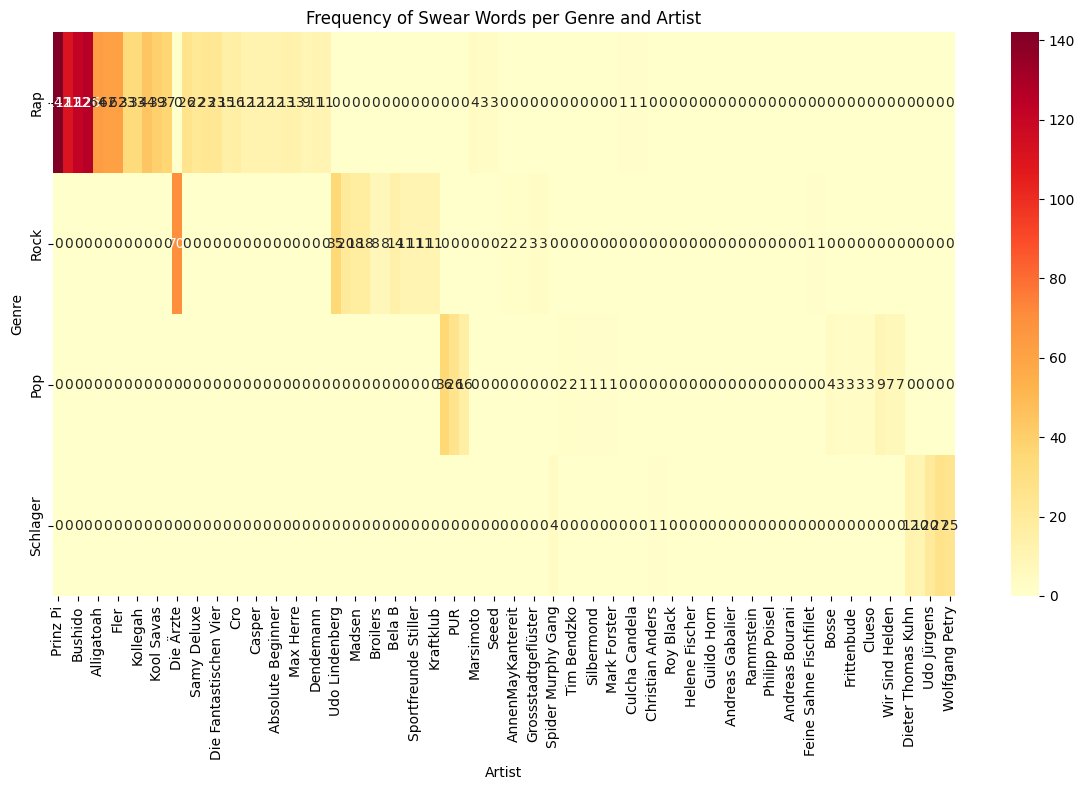

In [19]:
import seaborn as sns
from scipy.cluster import hierarchy

# Load the swear words from the file
with open('../data/raw/schimpfwörter.txt', 'r', encoding='utf-8') as file:
    swear_words = [word.strip() for word in file.readlines()]

# Create a DataFrame to store the swear word counts per genre and artist
swear_word_counts = pd.DataFrame(index=df['genre'].unique(), columns=df['interpret'].unique())

# Initialize the DataFrame with zeros
swear_word_counts.fillna(0, inplace=True)

# Iterate over the DataFrame and count the swear word occurrences
for index, row in df.iterrows():
    genre = row['genre']
    artist = row['interpret']
    lyrics = row['lyrics']
    
    count = 0
    for word in swear_words:
        count += lyrics.lower().count(word.lower())
    
    swear_word_counts.loc[genre, artist] += count

# Perform hierarchical clustering on both axes
genre_clusters = hierarchy.linkage(swear_word_counts, method='ward')
artist_clusters = hierarchy.linkage(swear_word_counts.T, method='ward')

# Reorder the DataFrame based on the clustering results
genre_order = hierarchy.leaves_list(genre_clusters)
artist_order = hierarchy.leaves_list(artist_clusters)

swear_word_counts = swear_word_counts.iloc[genre_order, artist_order]

# Create a heatmap to visualize the frequency of swear words per genre and artist
plt.figure(figsize=(12, 8))
sns.heatmap(swear_word_counts, cmap='YlOrRd', annot=True, fmt='g', cbar=True)
plt.title('Frequency of Swear Words per Genre and Artist')
plt.xlabel('Artist')
plt.ylabel('Genre')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### extras

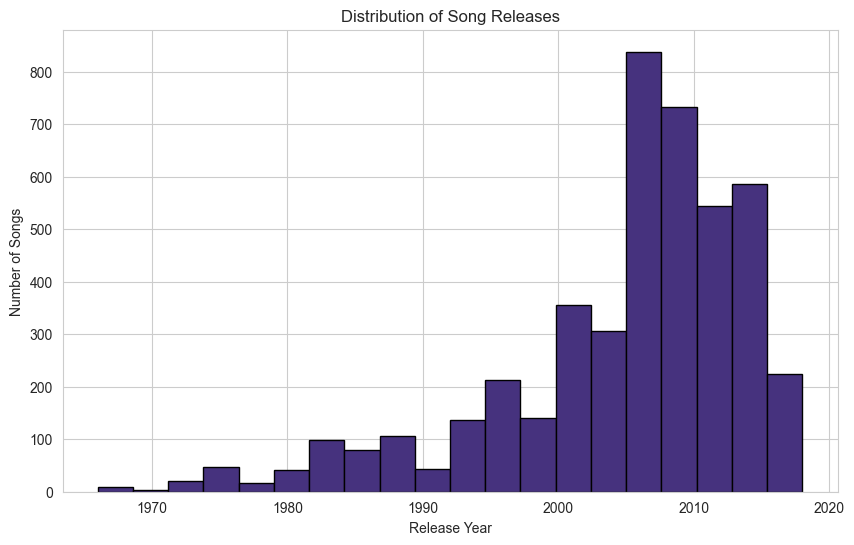

In [27]:
# Extract the release year column
release_years = df['release_year']

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(release_years, bins=20, edgecolor='black')

# Set the plot labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Songs')
plt.title('Distribution of Song Releases')

# Show the plot
plt.show()


## Mögliche visualization: Collaboration between Artist